In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
# Load the Letter Recognition dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar',
                'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
data = pd.read_csv(url, names=column_names)

In [4]:
# Preprocess the data
# Separate features and labels
X = data.drop('letter', axis=1).values  # 16 numerical features
y = data['letter'].values  # Target: letters A-Z

In [5]:
# Encode labels (A-Z to 0-25)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
# Convert labels to one-hot encoding for categorical crossentropy
num_classes = 26
y_one_hot = np.eye(num_classes)[y_encoded]

In [7]:
# Scale features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

# Print dataset shapes
print("X_train shape:", X_train.shape)  # (16000, 16)
print("y_train shape:", y_train.shape)  # (16000, 26)
print("X_test shape:", X_test.shape)    # (4000, 16)
print("y_test shape:", y_test.shape)    # (4000, 26)

X_train shape: (16000, 16)
y_train shape: (16000, 26)
X_test shape: (4000, 16)
y_test shape: (4000, 26)


In [9]:
# Define the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(16,)),  # Input layer + first hidden layer
    Dropout(0.2),  # 20% dropout to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer (26 classes)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1985 - loss: 2.8636 - val_accuracy: 0.6125 - val_loss: 1.4771
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5545 - loss: 1.4998 - val_accuracy: 0.7297 - val_loss: 1.0040
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6415 - loss: 1.1773 - val_accuracy: 0.7720 - val_loss: 0.8297
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6940 - loss: 0.9873 - val_accuracy: 0.7962 - val_loss: 0.7251
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7147 - loss: 0.9151 - val_accuracy: 0.8112 - val_loss: 0.6580
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7373 - loss: 0.8330 - val_accuracy: 0.8245 - val_loss: 0.6028
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7609 - loss: 0.7620 - val_accuracy: 0.8372 - val_loss: 0.5533
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7686 - loss: 0.7279 - val_accuracy: 0.

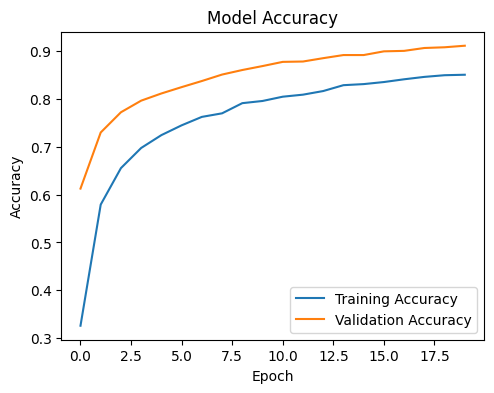

In [10]:
# Train the model
batch_size = 128
epochs = 20
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

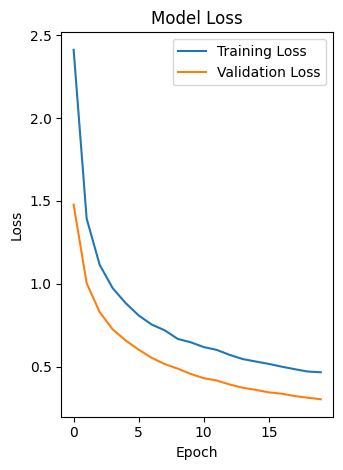

In [11]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


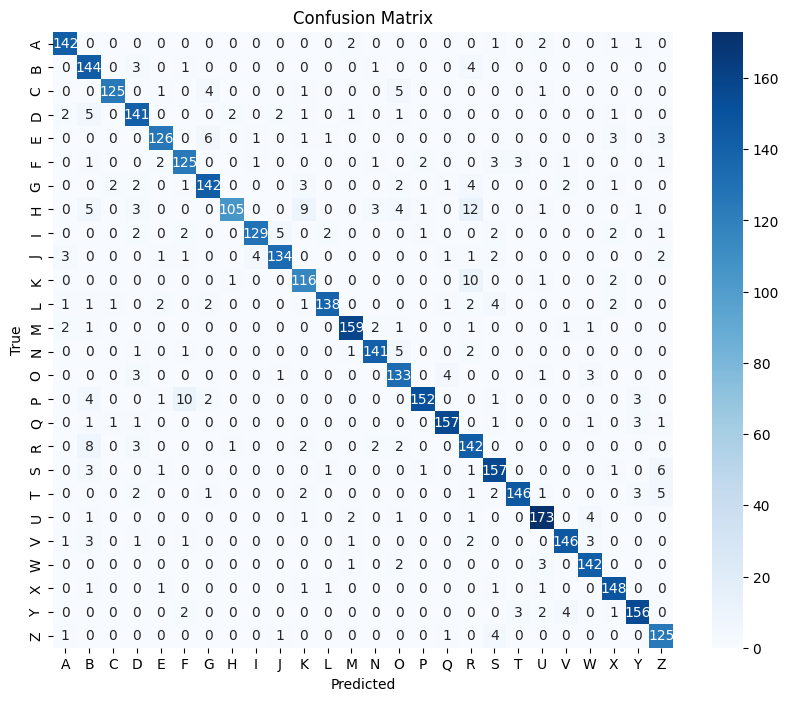

In [12]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

           A       0.93      0.95      0.94       149
           B       0.81      0.94      0.87       153
           C       0.97      0.91      0.94       137
           D       0.87      0.90      0.89       156
           E       0.93      0.89      0.91       141
           F       0.87      0.89      0.88       140
           G       0.90      0.89      0.90       160
           H       0.96      0.73      0.83       144
           I       0.96      0.88      0.92       146
           J       0.94      0.90      0.92       149
           K       0.84      0.89      0.87       130
           L       0.97      0.89      0.93       155
           M       0.95      0.95      0.95       168
           N       0.94      0.93      0.94       151
           O       0.85      0.92      0.88       145
           P       0.97      0.88      0.92       173
           Q       0.95      0.95      0.95       166
   